# Pull Request Features

プルリクエストの特徴量とバグ混入の有無の関係を調べる。

### バグ混入の有無でプルリクエストの特徴量に差があるかを検定

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency, mannwhitneyu


def get_significance(p):
    if p >= 0.05:
        return " "
    elif p >= 0.01:
        return "*"
    elif p >= 0.001:
        return "**"
    else:
        return "***"


NUMERIC_COLUMNS = (
    "age",
    "#added",
    "#deleted",
    "#commits",
    "#files",
    "#comments",
    "#review_comments",
    "#approvals",
    "#changes_requested",
)
BOOLEAN_COLUMNS = (
    "intra_branch",
    "fix",
    "test",
)

# プルリクエストの特徴量データを読み込む
df = pd.read_csv("data/pull_request_features.csv")
df = df[df["bot"] == False]
df = df[df["code_change"] == True]

# 不具合混入の有無でデータを分割
buggy_df = df[df["buggy"] == True]
clean_df = df[df["buggy"] == False]

result_df = pd.DataFrame()

# ==============================================
# 数値特徴量に対して Mann-Whitney U検定を実行
# ==============================================
for feature in NUMERIC_COLUMNS:
    buggy_values = buggy_df[feature]
    clean_values = clean_df[feature]

    # Mann-Whitney U検定
    stat, p = mannwhitneyu(buggy_values, clean_values)

    # 結果
    result_df = pd.concat(
        [
            result_df,
            pd.DataFrame(
                data={
                    "test": "Mann-Whitney U",
                    "p_value": p,
                    "significant": get_significance(p),
                },
                index=[feature],
            ),
        ]
    )

# ==============================================
# 真偽値特徴量に対してカイ二乗検定を実行
# ==============================================
for feature in BOOLEAN_COLUMNS:
    # カイ二乗検定
    table = pd.crosstab(df[feature], df["buggy"])
    stat, p, dof, expected = chi2_contingency(table)

    # 結果
    result_df = pd.concat(
        [
            result_df,
            pd.DataFrame(
                data={
                    "test": "Chi-squared",
                    "p_value": ,
                    "significant": get_significance(p),
                },
                index=[feature],
            ),
        ]
    )

# 結果を表示
print(result_df.to_latex())

\begin{tabular}{llrl}
\toprule
 & test & p_value & significant \\
\midrule
age & Mann-Whitney U & 0.000050 & *** \\
#added & Mann-Whitney U & 0.000000 & *** \\
#deleted & Mann-Whitney U & 0.000000 & *** \\
#commits & Mann-Whitney U & 0.000000 & *** \\
#files & Mann-Whitney U & 0.000000 & *** \\
#comments & Mann-Whitney U & 0.000495 & *** \\
#review_comments & Mann-Whitney U & 0.000000 & *** \\
#approvals & Mann-Whitney U & 0.000263 & *** \\
#changes_requested & Mann-Whitney U & 0.000626 & *** \\
intra_branch & Chi-squared & 0.700849 &   \\
fix & Chi-squared & 0.000000 & *** \\
test & Chi-squared & 0.000000 & *** \\
\bottomrule
\end{tabular}



### 機械学習モデルを使用して，予測精度と特徴量重要度を算出

Fold 1
Fold 2
Fold 3
\begin{tabular}{lrr}
\toprule
model & R.F. & G.B. \\
\midrule
accuracy & 0.83 & 0.82 \\
precision & 0.59 & 0.52 \\
recall & 0.18 & 0.16 \\
f1 & 0.28 & 0.25 \\
auc & 0.76 & 0.76 \\
mcc & 0.26 & 0.22 \\
\bottomrule
\end{tabular}

f1


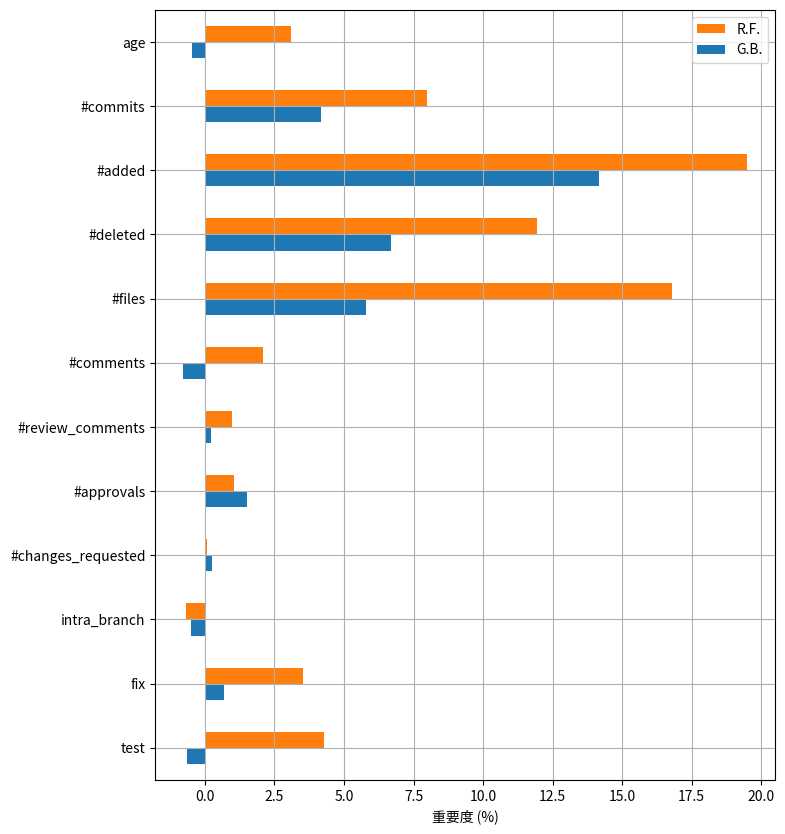

\begin{tabular}{lrr}
\toprule
model & R.F. & G.B. \\
\midrule
age & 3.09 & -0.46 \\
\#commits & 7.98 & 4.16 \\
\#added & 19.49 & 14.18 \\
\#deleted & 11.94 & 6.69 \\
\#files & 16.79 & 5.79 \\
\#comments & 2.10 & -0.77 \\
\#review\_comments & 0.97 & 0.22 \\
\#approvals & 1.06 & 1.52 \\
\#changes\_requested & 0.09 & 0.27 \\
intra\_branch & -0.69 & -0.51 \\
fix & 3.52 & 0.69 \\
test & 4.29 & -0.65 \\
\bottomrule
\end{tabular}

roc_auc


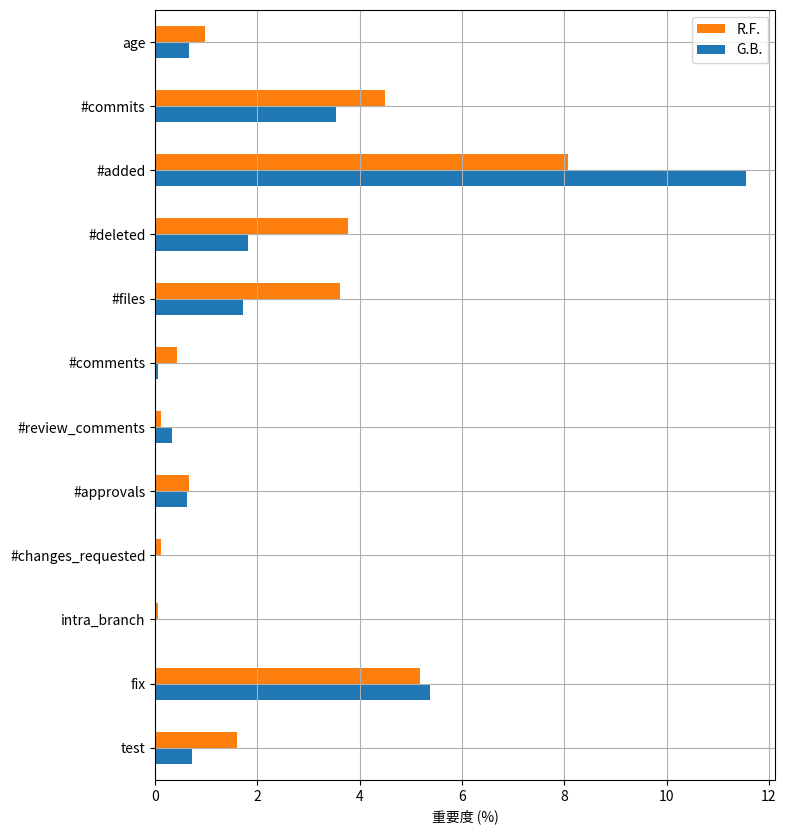

\begin{tabular}{lrr}
\toprule
model & R.F. & G.B. \\
\midrule
age & 0.97 & 0.67 \\
\#commits & 4.49 & 3.53 \\
\#added & 8.08 & 11.55 \\
\#deleted & 3.76 & 1.82 \\
\#files & 3.62 & 1.72 \\
\#comments & 0.42 & 0.05 \\
\#review\_comments & 0.12 & 0.34 \\
\#approvals & 0.65 & 0.62 \\
\#changes\_requested & 0.12 & 0.02 \\
intra\_branch & 0.05 & 0.00 \\
fix & 5.18 & 5.38 \\
test & 1.59 & 0.72 \\
\bottomrule
\end{tabular}

matthews_corrcoef


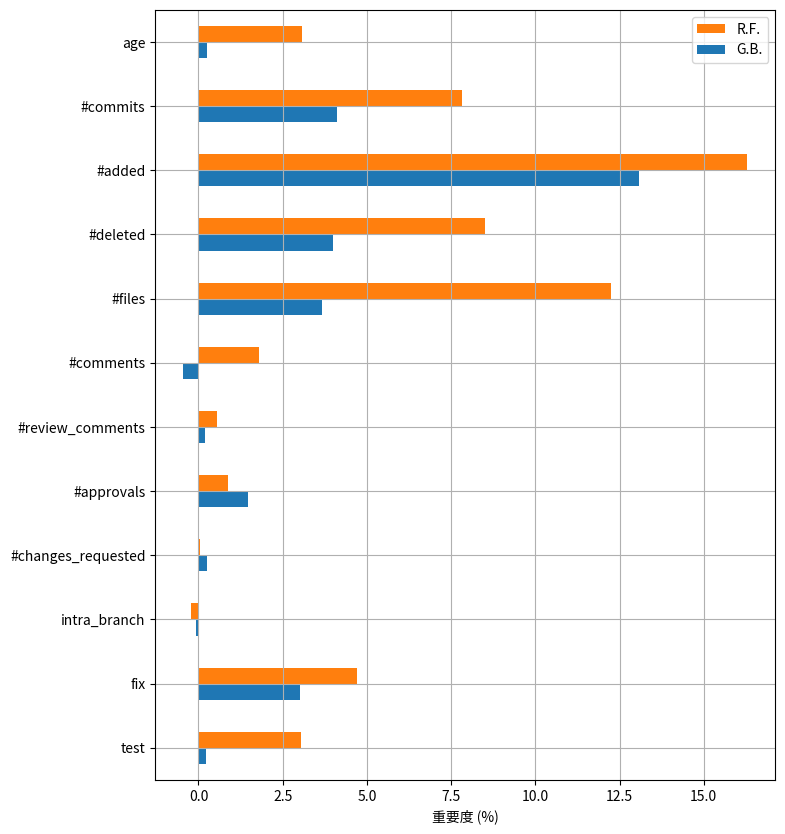

\begin{tabular}{lrr}
\toprule
model & R.F. & G.B. \\
\midrule
age & 3.06 & 0.25 \\
\#commits & 7.82 & 4.10 \\
\#added & 16.29 & 13.08 \\
\#deleted & 8.50 & 4.00 \\
\#files & 12.25 & 3.66 \\
\#comments & 1.81 & -0.45 \\
\#review\_comments & 0.54 & 0.18 \\
\#approvals & 0.88 & 1.46 \\
\#changes\_requested & 0.03 & 0.24 \\
intra\_branch & -0.24 & -0.06 \\
fix & 4.71 & 3.00 \\
test & 3.05 & 0.24 \\
\bottomrule
\end{tabular}



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    matthews_corrcoef,
    precision_score,
    recall_score,
    roc_auc_score,
)
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

EXCLUDE_COLUMNS = ["project", "id", "url", "bot", "code_change"]
SCORINGS = ("f1", "roc_auc", "matthews_corrcoef")

# プルリクエストの特徴量データを読み込み
df = pd.read_csv("data/pull_request_features.csv")
df = df[df["bot"] == False]
df = df[df["code_change"] == True]
df = df.drop(EXCLUDE_COLUMNS, axis=1)
X, y = df.drop("buggy", axis=1), df["buggy"]

# データを標準化
X = (X - X.mean()) / X.std()

# モデルの設定
models = {
    # "L.R.": LogisticRegression(),
    # "D.T.": DecisionTreeClassifier(random_state=0),
    "R.F.": RandomForestClassifier(class_weight="balanced", random_state=0),
    # "A.B.": AdaBoostClassifier(random_state=0),
    "G.B.": GradientBoostingClassifier(random_state=0),
    # "XGB": xgb.XGBClassifier(),
}

# クロスバリデーションの設定
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

# 特徴量の重要度を保持するデータフレーム
importance_df_dict = {scoring: pd.DataFrame() for scoring in SCORINGS}

# モデルの精度を保持するデータフレーム
scores_df = pd.DataFrame()

for i, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    print(f"Fold {i+1}")
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    for model_name, model in models.items():
        # モデルの学習
        model.fit(X_train, y_train)

        # モデルの精度の計算 (Accuracy, Precision, Recall, F1-Score, AUC, MCC)
        y_pred = model.predict(X_test)
        row = {
            "model": model_name,
            "accuracy": accuracy_score(y_test, y_pred),
            "precision": precision_score(y_test, y_pred),
            "recall": recall_score(y_test, y_pred),
            "f1": f1_score(y_test, y_pred),
            "auc": roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
            "mcc": matthews_corrcoef(y_test, y_pred),
        }

        scores_df = pd.concat(
            [
                scores_df,
                pd.DataFrame([row]),
            ],
            ignore_index=True,
        )
        for scoring in importance_df_dict.keys():
            # 特徴量の重要度の算出
            result = permutation_importance(
                model,
                X_test,
                y_test,
                n_repeats=10,
                random_state=0,
                scoring=scoring,
            )

            # 結果の保存
            row_df = pd.DataFrame(
                [
                    {
                        "model": model_name,
                    }
                    | {
                        feature: result.importances_mean[i]
                        for i, feature in enumerate(X_test.columns)
                    }
                ]
            )
            importance_df_dict[scoring] = pd.concat(
                [
                    importance_df_dict[scoring],
                    row_df,
                ],
                ignore_index=True,
            )

# ==============================
# 結果の可視化
# ==============================

# 精度の平均値
scores_df = scores_df.groupby("model").mean()
print(scores_df.T[models.keys()].to_latex(float_format="%.2f", escape=True))

plt.rc("font", family="Noto Sans CJK JP")
# 特徴量の重要度の平均値
for scoring, importance_df in importance_df_dict.items():
    importance_df = importance_df.groupby("model").mean() * 100
    importance_df = importance_df.T[models.keys()]

    # 描画
    ax = importance_df.iloc[::-1, ::-1].plot.barh(figsize=(8, 10))
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1])
    plt.grid()
    plt.xlabel("重要度 (%)")
    print(scoring)
    plt.show()
    print(importance_df.to_latex(float_format="%.2f", escape=True))

### ロジスティック回帰分析

In [ ]:
import numpy as np
import polars as pl
import statsmodels.api as sm

EXCLUDE_COLUMNS = ["project", "id", "url", "bot", "code_change"]

# プルリクエストの特徴量データを読み込み
df = (
    pl.read_csv("data/pull_request_features.csv")
    .filter(pl.col("bot") == False)
    .filter(pl.col("code_change") == True)
    .drop(EXCLUDE_COLUMNS)
)

# ロジスティック回帰分析
X = df.drop("buggy").to_pandas()
X = sm.add_constant(X)
y = df["buggy"].to_numpy()
model = sm.Logit(y, X.astype(float))
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.448142
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4931
Model:                          Logit   Df Residuals:                     4918
Method:                           MLE   Df Model:                           12
Date:                Sat, 01 Feb 2025   Pseudo R-squ.:                 0.04896
Time:                        17:11:18   Log-Likelihood:                -2209.8
converged:                       True   LL-Null:                       -2323.6
Covariance Type:            nonrobust   LLR p-value:                 6.455e-42
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.1278      0.076    -28.024      0.000      -2.277      -1.979
age  